In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [1]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost

In [3]:
customer_data = pd.read_csv('train.csv')  # load train data set
test = pd.read_csv('test.csv')  # load test data set

In [4]:
customer_data['State'] = pd.factorize(customer_data['State'])[0] + 1  # run to encode State as numeric

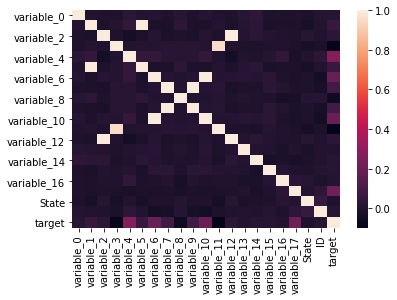

In [5]:
sb.heatmap(customer_data.corr()) # visualize correlations

In [6]:
## Let's leave all the variables in place, for now
X = customer_data.ix[:, 0:19].values
y = customer_data.ix[:, 20].values

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
## Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [31]:
## Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = log_reg.predict(X_test)

In [33]:
cm_1 = confusion_matrix(y_test, y_pred)
cm_1


array([[752,  14],
       [115,  19]])

In [34]:
print(classification_report(y_test, y_pred)) # results of the logistic model

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       766
           1       0.58      0.14      0.23       134

    accuracy                           0.86       900
   macro avg       0.72      0.56      0.57       900
weighted avg       0.82      0.86      0.82       900



In [35]:
## Decision Tree
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred = clf_tree.predict(X_test)

In [37]:
cm_2 = confusion_matrix(y_test, y_pred)
cm_2 # much better results

array([[729,  37],
       [ 40,  94]])

In [38]:
print(classification_report(y_test, y_pred)) # results of the tree model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       766
           1       0.72      0.70      0.71       134

    accuracy                           0.91       900
   macro avg       0.83      0.83      0.83       900
weighted avg       0.91      0.91      0.91       900



In [39]:
## Boosting
boost = xgboost.XGBClassifier()
boost.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = boost.predict(X_test)

In [41]:
cm_3 = confusion_matrix(y_test, y_pred)
cm_3 # much better results

array([[757,   9],
       [ 42,  92]])

In [42]:
print(classification_report(y_test, y_pred)) # results of the boosting model

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       766
           1       0.91      0.69      0.78       134

    accuracy                           0.94       900
   macro avg       0.93      0.84      0.88       900
weighted avg       0.94      0.94      0.94       900



####Boosting seems to be the best model so far, and I'll settle on using it for the predictions. So, let's create a new boosting model, but this time using the whole customer_data (train.csv) dataset. Afterwards I'll run predictions on the test dataset and add the target column.

In [0]:
## Since, the state and ID columns seem to be irrelevant and/or dependant on other variables I'll just drop those for simplicity
train_new = customer_data.drop(["State", "ID"], axis=1)
test_new = test.drop(["State", "ID"], axis=1)

In [0]:
## Split target and dependant variables
X_train = train_new.ix[:, 0:17].values
y_train = train_new.ix[:, 18].values
X_test = test_new.ix[:, 0:17].values

In [76]:
## New training
boost = xgboost.XGBClassifier()
boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
test_pred = boost.predict(X_test)

In [0]:
test_proba_pred = boost.predict_proba(X_test)

In [0]:
pos_target_proba = test_proba_pred[:,1]

In [0]:
## Appending the new columns for predicted target and its probabilities
test['target_pred'] = test_pred
test['target_pos_prob'] = pos_target_proba

In [0]:
## Sort the rows of dataframe by target probabilities
test_sorted = test.sort_values(by = 'target_pos_prob', ascending=False)
top_100 = test_sorted.head(100)

In [0]:
## Write DF into a file
top_100.to_csv('top_100.csv', encoding='utf-8')